Alumno: Erick Salvador Alvarez Valencia

In [20]:
library(jpeg)
library(rgl)
library(grid)
library(stats)
library(spatstat)
library(kernal)
set.seed(3)

ERROR: Error in library(spatstat): there is no package called ‘spatstat’


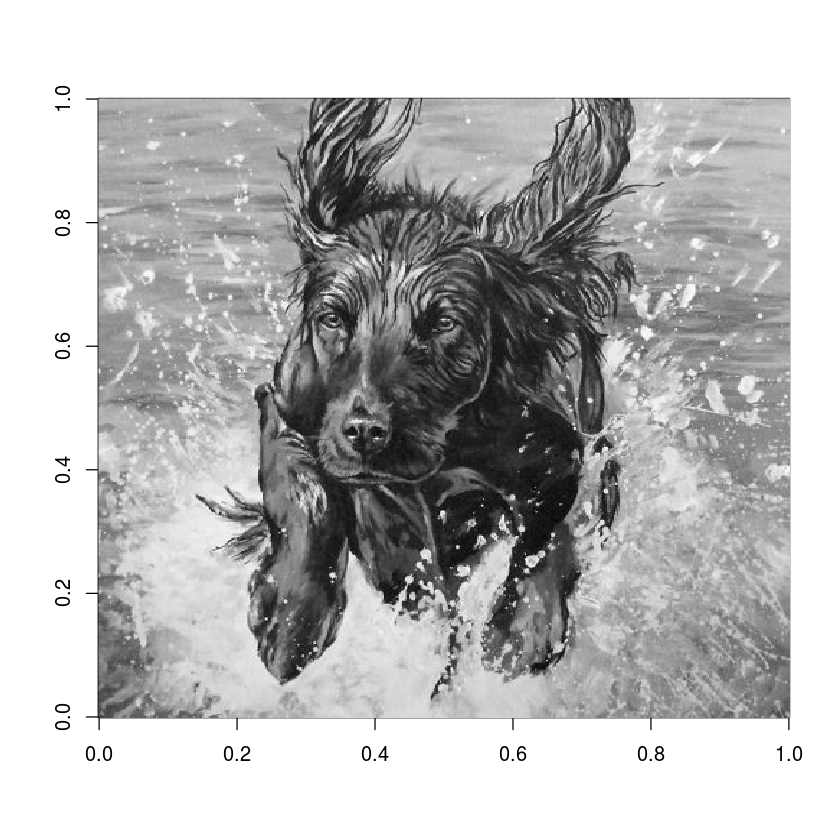

In [4]:
#Leer imagen
img<-readJPEG("dog.jpg")
imgGray<-0.3*img[,,1]+0.59*img[,,2]+0.11*img[,,3]
#Transformar la imagen
imgGray <- t(apply(imgGray, 2, rev))
# Visualizar
image(imgGray,col=gray((0:255)/255))

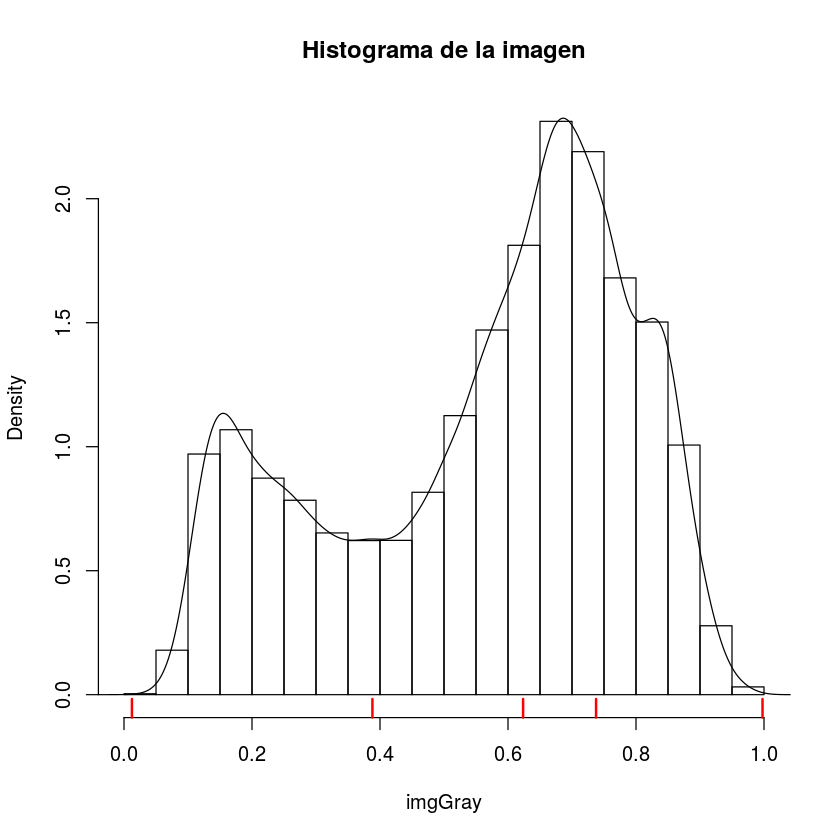

In [19]:
hist(imgGray, freq = FALSE, main = 'Histograma de la imagen')
rug(quantile(imgGray), col = 2, lwd = 2)
lines(density(imgGray))

In [8]:
imgGray

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
 [1,] 0.2432549 0.3138431 0.3813725 0.3363529 0.3047059 0.3134118 0.3013725
 [2,] 0.2314902 0.3295294 0.4519608 0.4401961 0.3806667 0.3243137 0.2769804
 [3,] 0.2824314 0.3294902 0.4598039 0.5245882 0.4850980 0.3879216 0.3405882
 [4,] 0.2667451 0.4510588 0.5696078 0.4500784 0.3439216 0.3674510 0.4063922
 [5,] 0.3107451 0.3185882 0.3520392 0.3324314 0.3243137 0.3447843 0.3652549
 [6,] 0.3029020 0.3185882 0.3324314 0.2853725 0.2783922 0.2977255 0.2750588
 [7,] 0.3323922 0.2618039 0.2587451 0.2980000 0.3459216 0.3223922 0.2593725
 [8,] 0.2814118 0.3206275 0.3410980 0.2744314 0.2674902 0.3106275 0.2829020
 [9,] 0.3147843 0.2951765 0.3175686 0.3371765 0.3067059 0.2870980 0.2674902
[10,] 0.3422353 0.3108627 0.3136471 0.3214902 0.3145490 0.3302353 0.3380784
[11,] 0.4466667 0.4113725 0.3867059 0.3553333 0.3302353 0.3459216 0.3459216
[12,] 0.5211765 0.5054902 0.4886667 0.4259216 0.3474902 0.3302353 0.3223922
[13,] 0.5181176 0.5298824 0.5298824 0.4581569 0.3514118 0.3161176 0.3293725
[14,] 0.5651765 0.5534118 0.5455686 0.4749804 0.3553333 0.3004314 0.3215294
[15,] 0.6338824 0.5868235 0.5651765 0.5181176 0.4141569 0.3396471 0.3215294
[16,] 0.6417255 0.5762353 0.5640392 0.5640392 0.5004314 0.4243529 0.3694510
[17,] 0.4974118 0.5915294 0.5954510 0.5680000 0.5758431 0.4829020 0.3652549
[18,] 0.4193725 0.5134902 0.5841176 0.5880392 0.5841176 0.5684314 0.4547059
[19,] 0.4464706 0.4582353 0.5563137 0.6072941 0.5916078 0.6229804 0.5590980
[20,] 0.5688627 0.4943529 0.5402745 0.6108627 0.5912549 0.6108627 0.6159608
[21,] 0.5889804 0.5497647 0.5564706 0.5878431 0.5839608 0.5957255 0.6243529
[22,] 0.4704314 0.5292549 0.5528235 0.5449804 0.5752157 0.6050196 0.6128627
[23,] 0.3751373 0.4312157 0.4743922 0.5018431 0.5516863 0.5893333 0.5960392
[24,] 0.3785098 0.3432157 0.3808627 0.4738431 0.5287843 0.5534902 0.5798039
[25,] 0.4109412 0.3729020 0.3886275 0.4070980 0.4043529 0.4632157 0.5561961
[26,] 0.3720784 0.3563922 0.3810980 0.4152549 0.4192157 0.4455294 0.5106275
[27,] 0.3684706 0.3712549 0.3790980 0.4049804 0.4038431 0.3725098 0.3909804
[28,] 0.3830196 0.3869412 0.3751765 0.3932157 0.3960000 0.3489804 0.3596078
[29,] 0.3796471 0.3808235 0.3651373 0.3847843 0.4110980 0.3954510 0.4464314
[30,] 0.3929804 0.3800784 0.3683137 0.3789412 0.3946667 0.3985882 0.4585882
[31,] ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮        
[32,] 0.5318039 0.6023922 0.5529020 0.4862353 0.5728235 0.6893333 0.7187059
[33,] 0.6063137 0.6612157 0.5960392 0.5176078 0.5755686 0.6198824 0.5790980
[34,] 0.5239608 0.5670980 0.5803137 0.6156471 0.6470196 0.5674510 0.4708627
[35,] 0.4886667 0.4925882 0.5489412 0.6391373 0.6430980 0.5332941 0.4627059
[36,] 0.5082745 0.4847451 0.5278824 0.5749412 0.5435686 0.5004314 0.4925882
[37,] 0.4651373 0.4690588 0.5239608 0.5318039 0.4847451 0.5043529 0.5239608
[38,] 0.3514118 0.5867059 0.5514118 0.4847451 0.5181176 0.4828235 0.4710588
[39,] 0.4925882 0.6455294 0.5749412 0.4808235 0.4789020 0.4592941 0.4867451
[40,] 0.4321961 0.5106275 0.4777647 0.4424706 0.4260392 0.4181569 0.4534510
[41,] 0.4165098 0.4125882 0.4189412 0.4357647 0.4299216 0.4349804 0.4593725
[42,] 0.5694510 0.4635686 0.4267843 0.4240000 0.4103137 0.4319216 0.4512157
[43,] 0.6047451 0.4753333 0.4424706 0.4357647 0.4220784 0.4425098 0.4315686
[44,] 0.5341569 0.4518039 0.4816863 0.4927059 0.4974510 0.5025098 0.4472941
[45,] 0.4831765 0.4337647 0.4828235 0.4867059 0.4898824 0.4856471 0.4198039
[46,] 0.4439608 0.4321961 0.4385490 0.4495686 0.4503922 0.4593725 0.4590588
[47,] 0.4204314 0.3867059 0.3956863 0.4278824 0.4232157 0.4083922 0.4229020
[48,] 0.5058039 0.4376863 0.3800000 0.3887059 0.4338431 0.4711373 0.4660392
[49,] 0.6665882 0.6352157 0.5069412 0.3682353 0.3612157 0.4232157 0.4165098
[50,] 0.6539608 0.6665882 0.5500784 0.3643137 0.2858431 0.3259216 0.3718039
[51,] 0.7088627 0.6186667 0.4786275 0.3892941 0.3712549 0.3564314 0.3642745
[52,] 0.5566275 0.4433333 0.3335294 0.3688235 0.466862

In [16]:
row <- 1
i <- 1
n <- nrow(imgGray)
plot(imgGray[row, ], imgGray[row, i : n - 1])

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


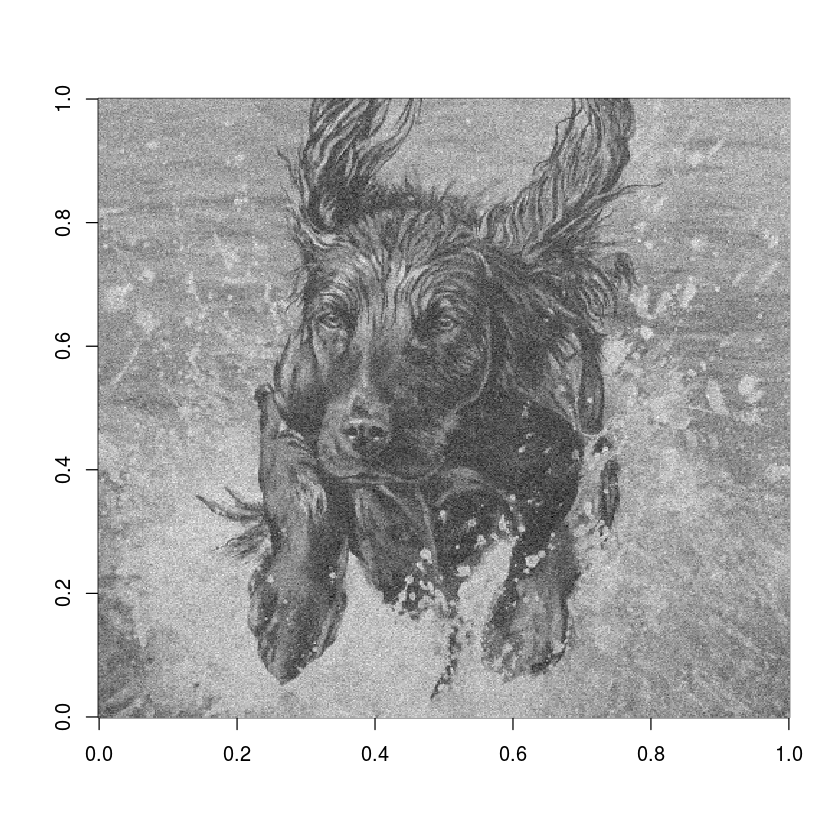

In [26]:
col <- ncol(imgGray)
row <- nrow(imgGray)
img2 <- imgGray
for(i in 1:row) {
    b <- rnorm(col, 0, 0.1)
    img2[i, ] <- imgGray[i, ] + b
}
image(img2,col=gray((0:255)/255))

## K-medias

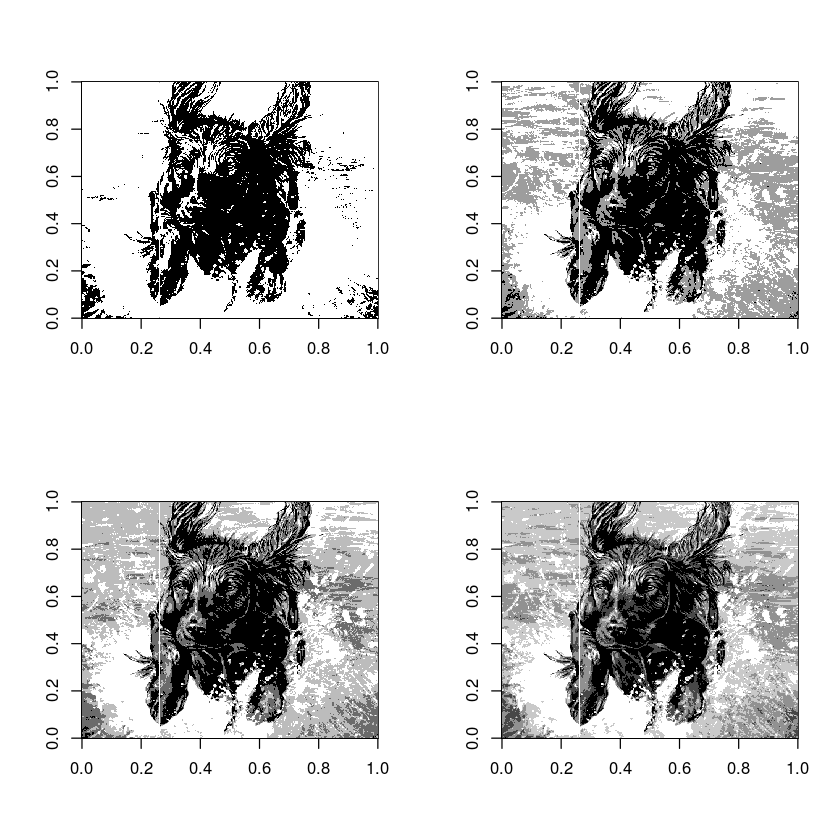

In [27]:
n<-ncol(imgGray)
##Ejemplo de segmentacion usando k-medias
#Show image for k in {2,3,4,5}
par(mfrow = c(2,2))
for (k in 2:5){
	km<-kmeans(as.vector(imgGray), k)
	cluster<-km$cluster
	for (l in 1:k){
		cluster<-replace(cluster, cluster == l, km$centers[l])
	}
	centerValM<-matrix(cluster, n, n)
    image(centerValM,col=gray((0:255)/255))
}

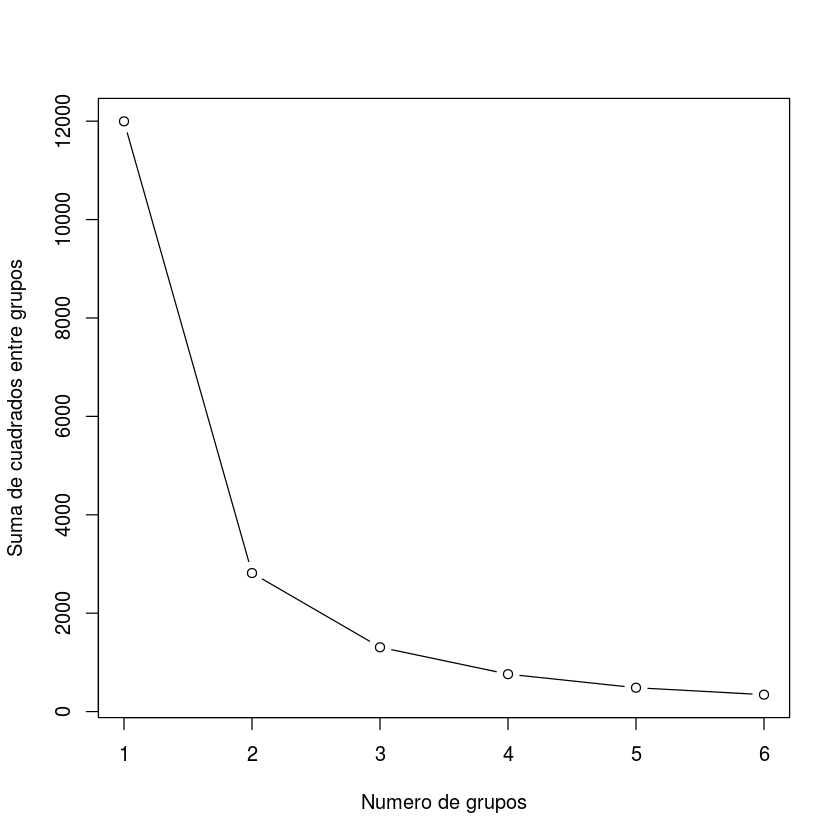

In [28]:
wss <- rep(0, 6)
wss[1] <- (n*n - 1) * sum(var(as.vector(imgGray)))
for (i in 2:6){
    wss[i] <- sum(kmeans(as.vector(imgGray),centers = i)$withinss)
}
plot(1:6, wss, type = "b", xlab = "Numero de grupos",
ylab = "Suma de cuadrados entre grupos")

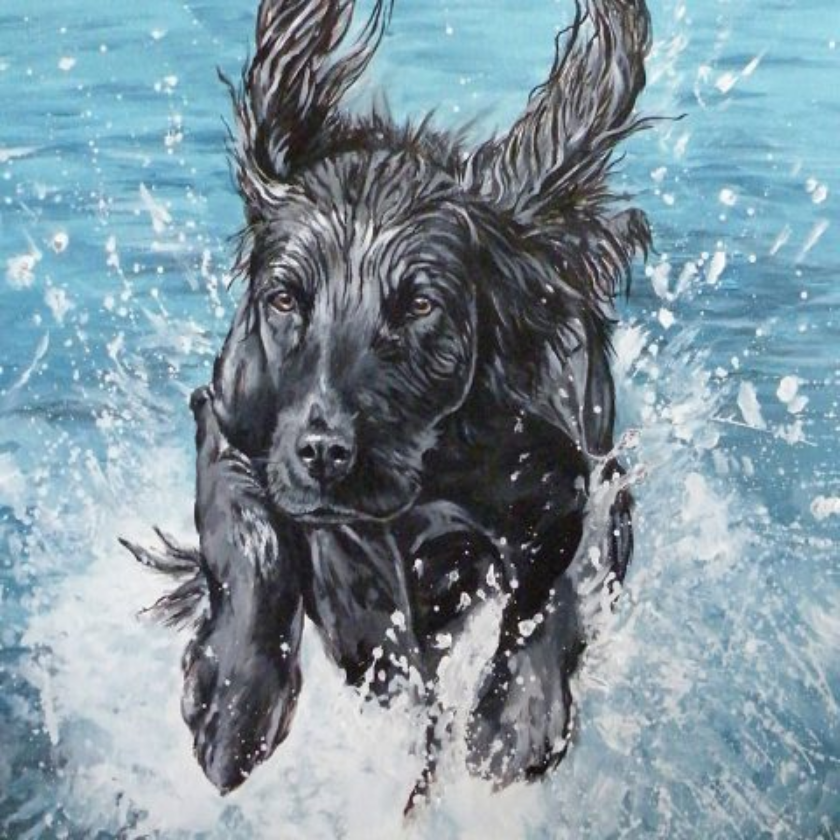

In [29]:
grid.raster(img)
data<-cbind(as.vector(img[,,1]),as.vector(img[,,2]),as.vector(img[,,3]))

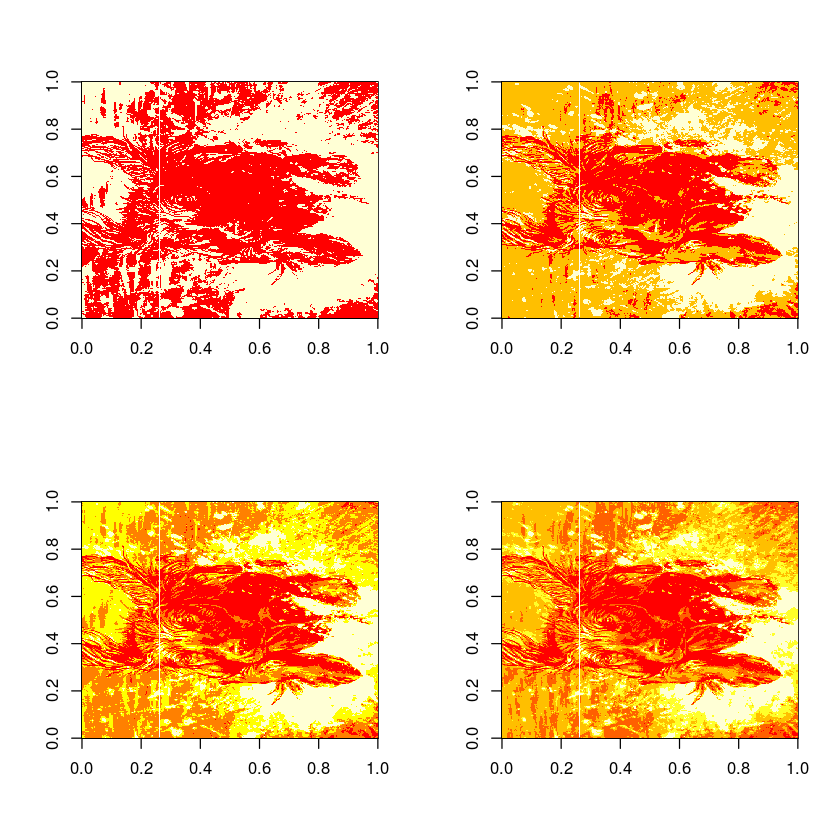

In [44]:
k <- 3
km <- kmeans(data, k)
clusterR <- km$cluster
clusterG <- km$cluster
clusterB <- km$cluster

for(l in 1:k) {
    
}

## SVD

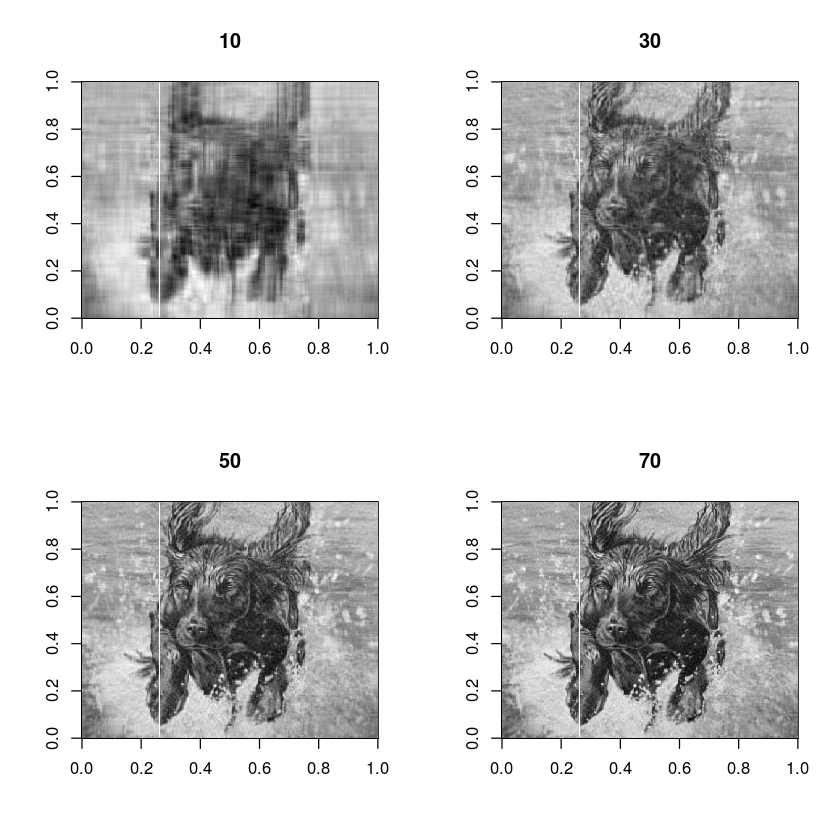

In [45]:
svdImg<-svd(imgGray)
d <- svdImg$d
u <- svdImg$u
v <- svdImg$v
par(mfrow = c(2,2))
#Hacemos la reconstruccion utilizando i valores propios  vectores propios
for (i in seq(10,70,20)){
    compressedImg<- u[,1:i] %*% diag(d[1:i]) %*% t(v[,1:i])
    image(compressedImg, col = gray((0:255)/255), main = i)
}

In [46]:
#FUNCIONES AUXILIARES
# Divide la una imagen en bloques de cxc
mat_split <- function(M, c){
	sizeCol <-ncol(M)/c
	sizeRow <-nrow(M)/c
	splitByCol<-lapply(1:c, function(x) {M[, ((x-1)*(sizeCol)+1):(x*sizeCol)]})
	splitByColRow<-lapply(splitByCol, function(mat){ 	
		lapply(1:c, function(x) {
			mat[((x-1)*(sizeRow)+1):(x*sizeRow), ]
		})
	})	
	return(splitByColRow)
}


#Recibe una lista de matrices y devuelve una lista de vectores
unrollMatrices<-function(matList){
	lapply(1:length(matList), function(y) {
		lapply(1:length(matList[[y]]), function(x) {c(t(matList[[y]][[x]]))})	
	})
}

#Recibe una lista de vectores y devuelve una matriz
vecsToMat<-function(vecList){
	res<-matrix(unlist(vecList), byrow = TRUE, ncol=length(vecList[[1]][[1]]))
	return(res)
}

#Reconstrucción de la imagen
#Recibe una matriz de componentes y devuelve la matriz con la imagen
matToImage<-function(matrixC){
	c<-sqrt(ncol(matrixC))
	imageList<-lapply(1:nrow(matrixC), function(x) {matrix(matrixC[x,], byrow=TRUE, ncol = c)})
	nImages<-sqrt(length(imageList))
	matImg<-lapply(0:(nImages-1), function(y) {
			do.call(rbind, imageList[seq(nImages*y+1, nImages*(y+1))])
	})
	res<-do.call(cbind, matImg)
	return(res)
}

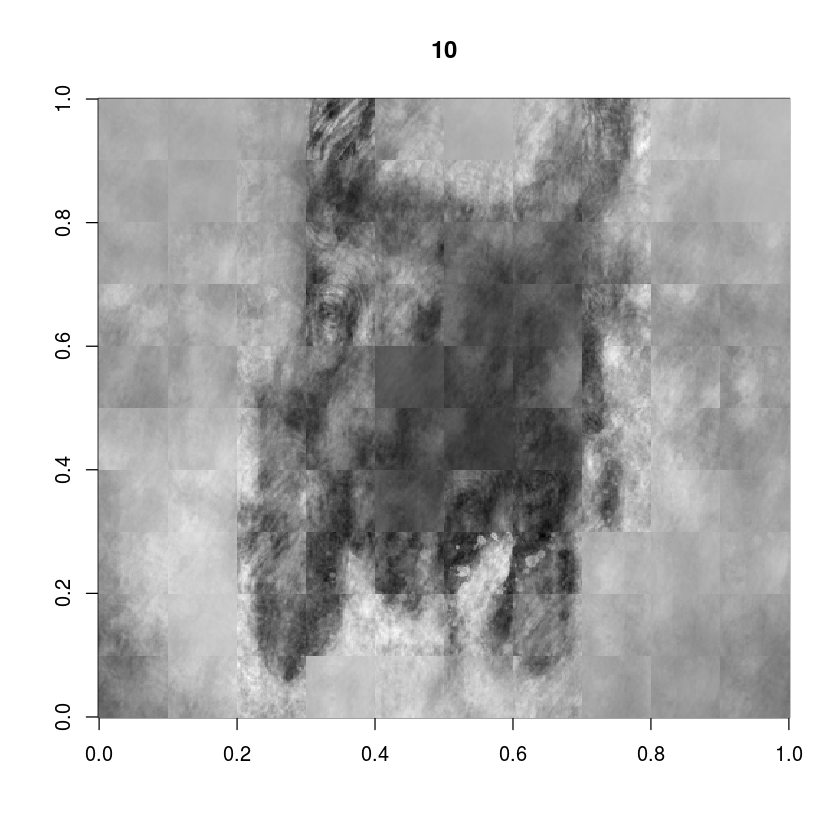

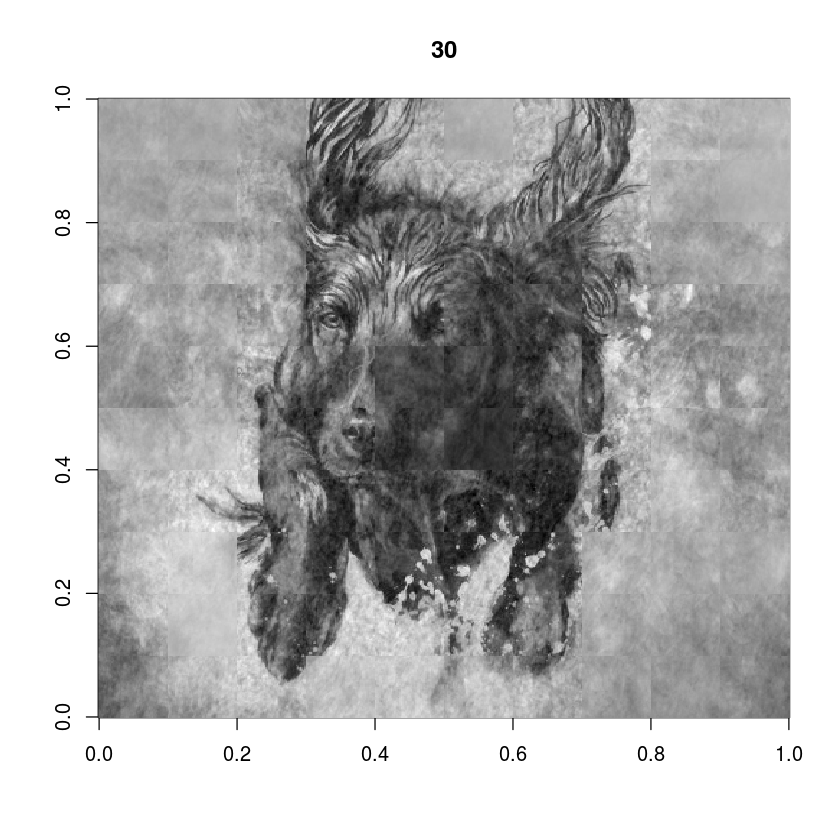

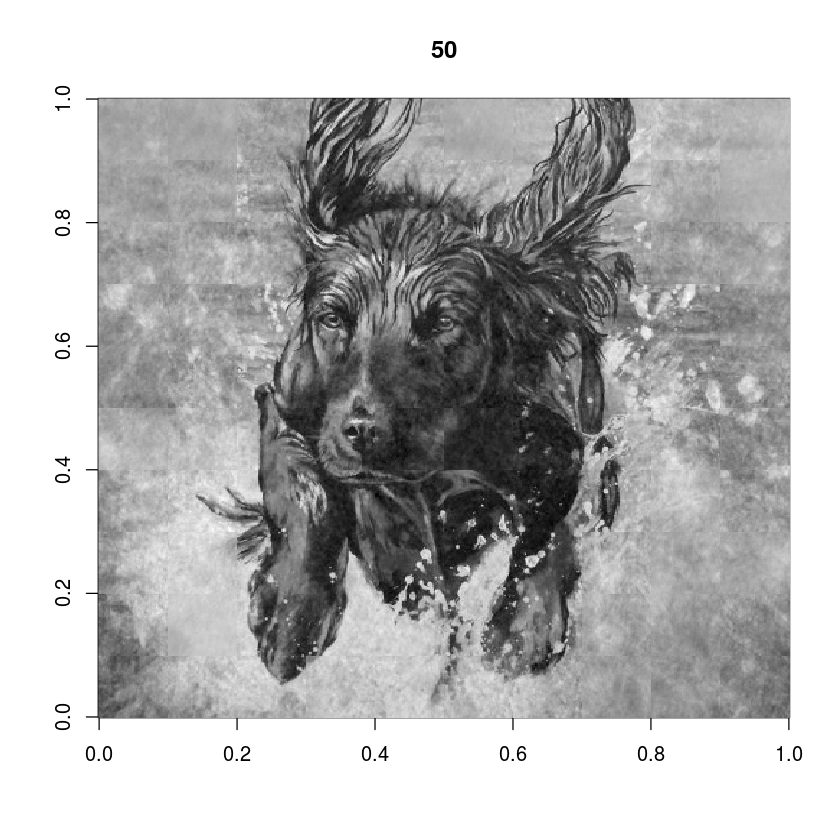

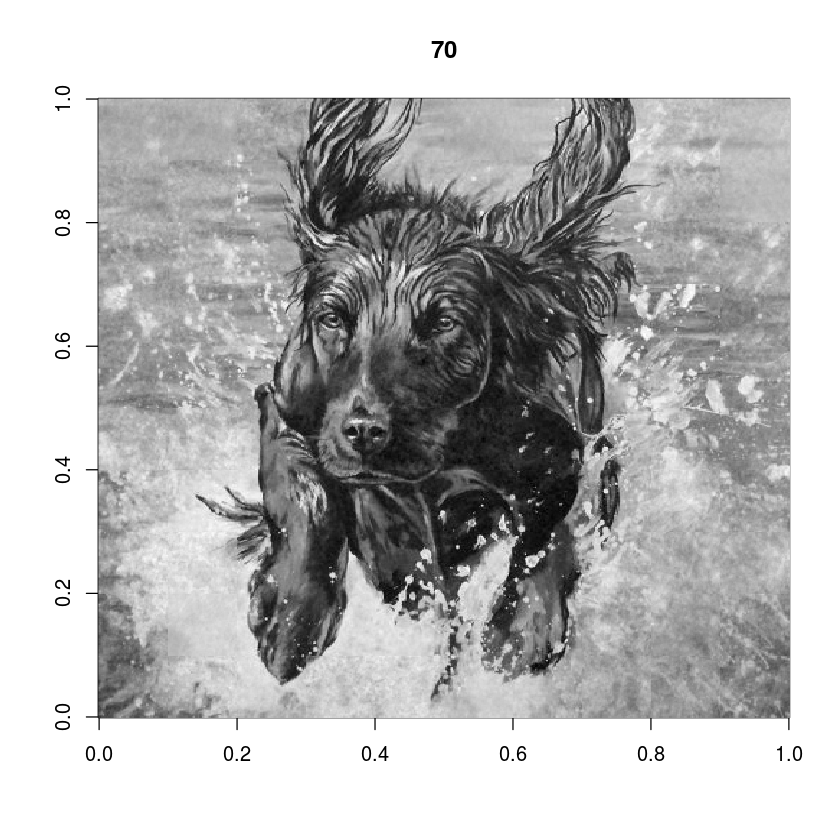

In [71]:
bloqs <- mat_split(imgGray, 10)
listb <- unrollMatrices(bloqs)
mrec <- vecsToMat(listb)
#print(mrec)
pca <- princomp(t(mrec))
for (i in seq(10, 70, 20)){
    im <- pca$scores[,1:i] %*% t(pca$loadings[, 1:i])
    res <- im + matrix(rep(colMeans(t(mrec)), each = nrow(pca$scores[,1:i])), nrow = nrow(pca$scores[,1:i]))
    mti <- matToImage(t(res))
    image(mti, col = gray((0:255)/255), main = i)
}